# Optimization & Fitting a Model to Data

In [1]:
using DyVE

### Environment Setup

In [2]:
test_acs = @ReactionNetwork
 
@push test_acs begin
    rate, @conserved(FTE)+ 0.5*raw + demand + 2*money --> product, ct=>cycletime
    rate_, ∅ --> product
end

DyVE.FoldedReactionNetworkType{Symbol, Union{Missing, String, Symbol}, Union{Float64, Int64, AbstractString, Expr, Function, Symbol}, Set{Symbol}, DyVE.FoldedObservable} with elements S = 1:5, T = 1:2, E = 1:0, obs = 1:0, P = 1:0, M = 1:0
┌───┬──────────┬───────────────┬─────────────┬─────────────────────┬────────────
│ S │ specName │  specModality │ specInitVal │ specInitUncertainty │ specCost  ⋯
├───┼──────────┼───────────────┼─────────────┼─────────────────────┼────────────
│ 1 │      FTE │ Set{Symbol}() │         0.0 │                 0.0 │      0.0  ⋯
│ 2 │      raw │ Set{Symbol}() │         0.0 │                 0.0 │      0.0  ⋯
│ 3 │   demand │ Set{Symbol}() │         0.0 │                 0.0 │      0.0  ⋯
│ 4 │    money │ Set{Symbol}() │         0.0 │                 0.0 │      0.0  ⋯
│ 5 │  product │ Set{Symbol}() │         0.0 │                 0.0 │      0.0  ⋯
└───┴──────────┴───────────────┴─────────────┴─────────────────────┴────────────
                                                               2 columns omitted
┌───┬──────────────────────────────────────────────────────┬───────────────┬────
│ T │                                                trans │ transPriority │ t ⋯
├───┼──────────────────────────────────────────────────────┼───────────────┼────
│ 1 │ @conserved(FTE) + 0.5raw + demand + 2money → product │             1 │   ⋯
│ 2 │                                          ∅ → product │             1 │   ⋯
└───┴──────────────────────────────────────────────────────┴───────────────┴────
                                                               8 columns omitted

Set the initial values, declare parameters:

In [3]:
# initial values, params
@prob_init test_acs FTE=5 raw=20 demand=18 product=15 money=30
@prob_params test_acs rate=2 cycletime=2 rate_=0
 
@prob_meta test_acs tspan=20

### Problem Check

┌ Warning: use values(kwargs) and keys(kwargs) instead of kwargs.data and kwargs.itr
│   caller = #85 at forwarddiff.jl:68 [inlined]
└ @ Core /Users/bima/.julia/packages/DiffEqBase/xOkrD/src/forwarddiff.jl:68
┌ Warning: use values(kwargs) and keys(kwargs) instead of kwargs.data and kwargs.itr
│   caller = #85 at forwarddiff.jl:68 [inlined]
└ @ Core /Users/bima/.julia/packages/DiffEqBase/xOkrD/src/forwarddiff.jl:68


┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


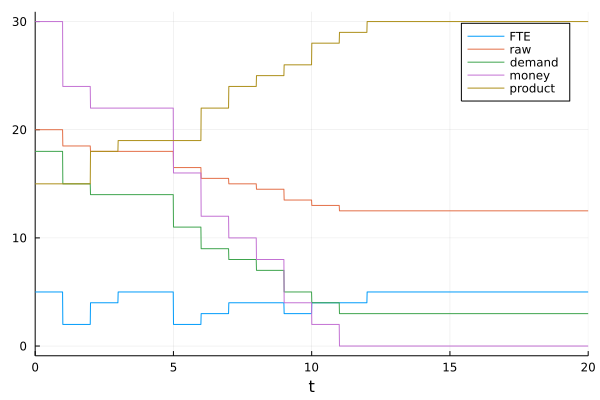

In [4]:
prob = @problematize test_acs
sol = @solve prob
@plot sol

## Optimization

In [5]:
# check https://github.com/JuliaOpt/NLopt.jl for solver opts
@optimize test_acs product product=5 rate_ objective=max lower_bounds=0 upper_bounds=20 maxeval=500 final_only=true

(449.71604938271605, [12.716049382716047, 19.629629629629626], :MAXEVAL_REACHED)

## Fitting a Model to Data

### Provide Empirical Data

In [25]:
t = [10, 20]
data = [25 30]

1×2 Matrix{Int64}:
 25  30

### Fit

In [26]:
@fit test_acs data t vars=product product=10 rate_ lower_bounds=0 upper_bounds=20 maxeval=10000

(0.0, [10.0, 0.3703703703703709], :MAXEVAL_REACHED)

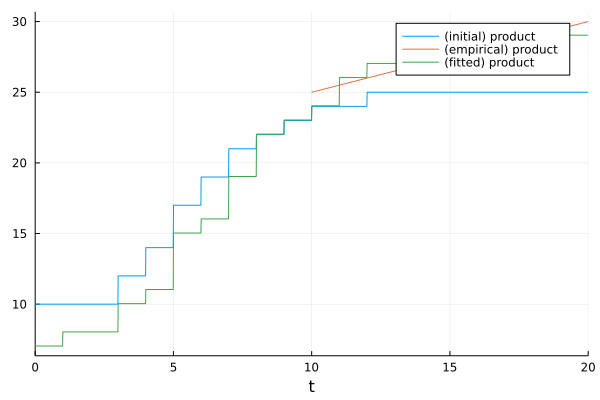

In [27]:
# plot the fitted model's solution
@fit_and_plot test_acs data t vars=product product=10 rate_ lower_bounds=0 upper_bounds=20 maxeval=10000